# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday February 2nd**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [509]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

An owner of an animal sanctuary wants to estimate her sanctuary's average food consumption over the next year in order to estimate the future food costs. Her sanctuary comprises 75 pandas, 25 otters, 50 buffalo, and 50 owls. The owner pops open her SanctuaryTrackr App's Current Resident List, randomly selects 24 animals from it, and tracks their food consumptions in pounds per day (lbs/day) over the next week. So as to get a good estimate, she intentionally selects 9 pandas, 3 otters, 6 buffalo, and 6 owls. 

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

Identify the following: 

- the population: the animals in the sanctuary (200 total)
- the sample frame: the SanctuaryTrackr App's Current Resident List
- the sample: the animals she selects (9 pandas, 3 otters, 6 buffalo, and 6 owls)
- the type of sample: stratified sample 
- the quantity of interest: the food consumption (pounds)

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
3.2 \quad
4.2 \quad
3.0 \quad
6.6
$$

**Part A**: Compute the sample mean and sample median.


**To find the mean:**

The sum of the numbers:
$$
4.6+5.0+6.5+7.7+3.2+4.2+3.0+6.6 = 40.8
$$

Division by the number of elements:
$$40.8/8 = 5.1$$


**To find the median:**

First sort the numbers:
$$
3.0 \quad
3.2 \quad
4.2 \quad
4.6 \quad
5.0 \quad
6.5 \quad
6.6 \quad
7.7
$$

To find the median of an even $n$ set, find the mean of items n/2 and (n+2)/2. 

$$
4.6+5.0=9.6 \quad
9.6/2=4.8
$$
The median is 4.8.

**Part B**: We replace the element $5.0$ by some real number $q$. What happens with the sample mean and the sample median of this new dataset as $q \rightarrow -\infty$?

If we replace the element 5.0 by some real number $q$, the sample mean will approach $-\infty$ as $q \rightarrow - \infty$. The sample median will be the result of (4.6 + 6.5)/2, because the number will be sorted in order and $q$ will always take the place as the lowest number. This means that the n/2 element will be 4.6, and the (n+2)/2 element will be 6.5. The result of (4.6 + 6.5)/2  the median 5.55.

**Part C**: We replace a number of elements by some real number $q$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $q \rightarrow -\infty$?

The number of elements we would need to replace is 4. We would need the n/2 element to have the characteristic of $q \rightarrow -\infty$?. Thus, the result of the mean of the n/2 element and the (n+2)/2 element would still approach $-\infty$.

**Part D**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $q$, so that the sample mean of the new dataset diverges as $q \rightarrow -\infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

For the sample mean of the new dataset to diverge as $q \rightarrow -\infty$?, we would simply need one element to approach $-\infty$. For an set with an even number of $n$ elements, we would need n/2 elements to be replaced by some real number $q$ so that the sample median of the new dataset goes to infinity. For a set with an odd number of $n$ elements, we would need (n+1)/2 elements to be replaced by some real number $q$ so that the sample median of the new dataset goes to infinity.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

$$
\bar{x}_n = \frac{1}{n}(\sum_{k=1}^{n-1} x_k + x_n)
$$

$$
\bar{x}_{n-1} = \frac{1}{n-1}\sum_{k=1}^{n-1} x_k
$$

$$
\bar{x}_n = \frac{1}{n}(\sum_{k=1}^{n-1} x_k + x_n)\frac{n-1}{n-1}
$$

$$
\bar{x}_n = \frac{n-1}{n}(\frac{\sum_{k=1}^{n-1} x_k}{n-1} + \frac{x_n}{n-1})
$$

$$
\bar{x}_n = \frac{n-1}{n}(\bar{x}_{n-1} + \frac{x_n}{n-1})
$$

$$
\bar{x}_n = \frac{\bar{x}_{n-1}(n)-\bar{x}_{n-1}}{n} + \frac{x_n}{n}
$$

$$
\bar{x}_n = \frac{\bar{x}_{n-1}(n)-\bar{x}_{n-1} + x_n}{n}
$$

$$
\bar{x}_n = \frac{x_n-\bar{x}_{n-1}}{n} + \bar{x}_{n-1}
$$




**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [525]:
def my_sample_mean(A):
    sum = 0
    for i in A:
        sum = sum + i
    mean = sum/len(A)
    return mean

def my_sample_var(A):
    mean = my_sample_mean(A)
    variance = 0
    for i in A:
        squares = (i - mean)**2
        variance = variance + squares
    variance = variance/(len(A)-1)
    return variance


**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array.

`otter_weights = [25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27]`

In [527]:
otter_weights = [25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27]
print("The mean for the otter_weights data set is {}.".format(my_sample_mean(otter_weights)))
print("The variance for the otter_weights data set is {}.".format(my_sample_var(otter_weights)))

The mean for the otter_weights data set is 21.153846153846153.
The variance for the otter_weights data set is 157.30769230769232.


**Output**

The mean for the otter_weights data set is 21.153846153846153.
The variance for the otter_weights data set is 157.30769230769232.

**Summary**

As shown above, the mean for otter_weights is 21.15, and the variance for otter weights is 157.31.

**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first one otter, the first two otters, the first three otters, and so on up to all the otters. Store your otter means in a numpy array called `otterations`.

In [528]:
def update_mean(xOfN, xBarNMinusOne, n):
    mean = xBarNMinusOne + ((xOfN - xBarNMinusOne)/n)
    return mean

def otter_means(A):
    otterations = np.zeros(len(A))
    otterations[0] = A[0]
    for i in range(1,len(A)):
        otterations[i] = update_mean(A[i],otterations[i-1],i+1)
    return otterations

otter_means(otter_weights)
            
        

array([ 25.        ,  27.        ,  31.33333333,  28.25      ,
        24.        ,  21.        ,  18.42857143,  17.625     ,
        17.77777778,  18.1       ,  18.45454545,  20.66666667,  21.15384615])

**Output**

array([ 25.,27.,31.33333333,28.25,
        24.,21.,18.42857143,17.625,
        17.77777778,18.1,18.45454545,  20.66666667,21.15384615])


**Summary**

The output of the code above is the result of using the function otter_means to iterate through otter_weights, passing in arguments to update_mean.

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

If class warfare occurred in the final hours aboard the Titanic, one might expect that more survivors pertaining to a higher class status (Pclass)to have survived. If male chivalry was widespread during the final hours instead, one might expect that more survivors would be female (Sex) instead of male. The two hypotheses are not mutually exclusive, because one can be a woman as well as belong to a higher class.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [530]:
local_path = 'titanic_data.csv'
dfTitanic = pd.read_csv(local_path)
dfTitanic = dfTitanic[pd.notnull(df["Age"]) & pd.notnull(df["Pclass"]) & pd.notnull(df["Survived"] & pd.notnull(df["Sex"]))]
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [544]:
class1passengers = dfTitanic.loc[dfTitanic["Pclass"] == 1].copy()
class2passengers = dfTitanic.loc[dfTitanic["Pclass"] == 2].copy()
class3passengers = dfTitanic.loc[dfTitanic["Pclass"] == 3].copy()

class1passengersurvived = class1passengers["Survived"].sum()
class2passengersurvived = class2passengers["Survived"].sum()
class3passengersurvived = class3passengers["Survived"].sum()

class3fraction = class3passengersurvived/len(class3passengers)
class2fraction = class2passengersurvived/len(class2passengers)
class1fraction = class1passengersurvived/len(class1passengers)

print("The fraction of survivors from passenger class 1 is {}.".format(class1fraction))
print("The fraction of survivors from passenger class 2 is {}.".format(class2fraction))
print("The fraction of survivors from passenger class 3 is {}.".format(class3fraction))


The fraction of survivors from passenger class 1 is 0.6428571428571429.
The fraction of survivors from passenger class 2 is 0.4827586206896552.
The fraction of survivors from passenger class 3 is 0.2518703241895262.


**Output**

The fraction of survivors from passenger class 1 is 0.26932668329177056.
The fraction of survivors from passenger class 2 is 0.4827586206896552.
The fraction of survivors from passenger class 3 is 0.6011904761904762.

**Summary**

The outputs shown above are the result of taking the number of passengers in their respective classes that survived, divided by the total number of passengers in their class.


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [536]:
class1maletotals = class1passengers.loc[class1passengers["Sex"] == 'male']
class3femaletotals = class3passengers.loc[class3passengers["Sex"] == 'female']

class1male = class1passengers.loc[class1passengers["Sex"] == 'male', "Survived"].sum()
class2male = class2passengers.loc[class2passengers["Sex"] == 'male', "Survived"].sum()
class3male = class3passengers.loc[class3passengers["Sex"] == 'male', "Survived"].sum()

class1female = class1passengers.loc[class1passengers["Sex"] == 'female', "Survived"].sum()
class2female = class2passengers.loc[class2passengers["Sex"] == 'female', "Survived"].sum()
class3female = class3passengers.loc[class3passengers["Sex"] == 'female', "Survived"].sum()

class1malefraction = class1male/len(class1maletotals)
class3femalefraction = class3female/len(class3femaletotals)

print("The fraction of survivors from passenger class 1 that were also male is {}.".format(class1malefraction))
print("The fraction of survivors from passenger class 2 that were also female {}.".format(class3femalefraction))


The fraction of survivors from passenger class 1 that were also male is 0.3870967741935484.
The fraction of survivors from passenger class 2 that were also female 0.5254237288135594.


**Output**

The fraction of survivors from passenger class 1 that were also male is 0.3870967741935484.
The fraction of survivors from passenger class 3 that were also female 0.5254237288135594.

**Summary**

The output above shows that a greater fraction of women in third class had a higher survival rate at 52.5%, compared to the fraction of men in first class at 38.7%.


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

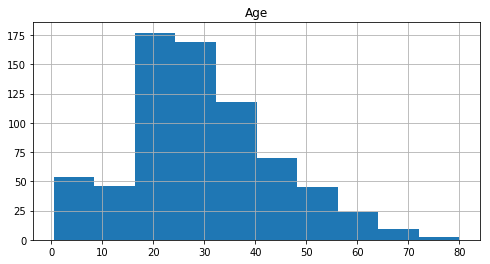

In [190]:
fig, ax = plt.subplots(figsize=(8,4))
dfTitanic.hist(column="Age", ax=ax);

**Summary**

The distribution of age is unimodally positive skewed, as shown by the graph above.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [543]:
survivors = dfTitanic.loc[dfTitanic["Survived"] == 1].copy()
victims = dfTitanic.loc[dfTitanic["Survived"] == 0].copy()

femalesurvivorage = survivors.loc[survivors["Sex"] == 'female', "Age"].copy()
femalevictimage = victims.loc[victims["Sex"] == 'female', "Age"].copy()

femalesurvivormean = my_sample_mean(femalesurvivorage)
femalevictimmean = my_sample_mean(femalevictimage)

femalesurvivorage = femalesurvivorage.sort_values().reset_index(drop=True)
femalevictimage = femalevictimage.sort_values().reset_index(drop=True)

def evenMedianFind(A):
    temp1 = len(A)/2
    temp2 = (len(A)+2)/2
    median = (A.loc[temp1]+A.loc[temp2])/2
    return median

def oddMedianFind(A):
    median = (A.loc[(len(A)+1)/2])
    return median


femalesurvivormedian = evenMedianFind(femalesurvivorage)
femalevictimmedian = oddMedianFind(femalevictimage)

print("The mean of female survivors is {}.".format(femalesurvivormean))
print("The mean of female non-survivors is {}.".format(femalevictimmean))
print("The median of female survivors is {}.".format(femalesurvivormedian))
print("The median of female non-survivors is {}.".format(femalevictimmedian))



The mean of female survivors is 28.40558510638298.
The mean of female non-survivors is 28.922063492063494.
The median of female survivors is 26.0.
The median of female non-survivors is 29.0.


**Output**

The mean of female survivors is 28.40558510638298.
The mean of female non-survivors is 28.922063492063494.
The median of female survivors is 26.0.
The median of female non-survivors is 29.0.

**Summary**

As shown above, the mean and median of female survivors was lower than the mean of female non-suvivors.

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

**Summary**

The data suggests a comination of class warfare and male chivalry in the final hours aboard the Titanic. When looking at the fraction of survivors based on class, class 1 survivors had the highest percent at 64.3%, while class 3 survivors had the lowest surivate rate at 25.2%. At the same time, females had a higher chance of survival at 52.5% compared to males in class 1 at 38.7% However, one can also see in the histogram that the peak of the curve was with 20 year olds. The mean of and median of female survivors was still lower than the mean and median of female non-survivors.

### Problem 5 - Not anotter homework problem! :(
***

Otters are undisputedly one of nature's most awesome animals. From a cursory Google Image Search of *baby otter* or *otters holding hands* or *otters water slide* this is easy to demonstrate.

Because the CS Department was able to pull a few strings, we have obtained a dataset of sea otter behavior. For each otter studied, the dataset contains:

- **hhrecord**: the otter's personal record for hand-holding (hours; 999) 
- **pawsize**: the size of the otter's paw (unspecified units; 999)
- **floatation**: boolean, indicating whether the otter displayed leadership in floatation. (9)
- **satscore**: the otter's projected SAT score percentile. (unclear why this was included; 99)
- **height**: otter's height (unspecified units; 99)
- **weight**: otter's weight (unspecified units; 999)
- **urchins**: boolean, indicating whether the otter was observed eating urchins (9)

All these data are included in the whitespace-delimited file `otters.data`


**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values. Those values are listed parenthetically in the description above Store the modified data set in a Pandas DataFrame called dfOtters. 

In [545]:
local_path = 'otters.data'
dfOtters = pd.read_csv(local_path,delim_whitespace=True,header=0)

dfOtters = dfOtters[dfOtters['hhrecord']!=999]
dfOtters = dfOtters[dfOtters['pawsize']!=999]
dfOtters = dfOtters[dfOtters['floatation']!=9]
dfOtters = dfOtters[dfOtters['satscore']!=99]
dfOtters = dfOtters[dfOtters['height']!=99]
dfOtters = dfOtters[dfOtters['weight']!=999]
dfOtters = dfOtters[dfOtters['urchins']!=9]

**Part B**: Use the information in dfOtters to create a density histogram of the hand-holding records of otters who do not eat sea urchins (urchins=0) and another histogram placed directly below the first in the same graphics device for the hand-holding records of otters who do eat urchins (urchins=1).  Make the range of the horizontal axis $30$ to $180$ (hours) for both histograms.  Make sure to give each subplot titles and label axes. 

(30, 180)

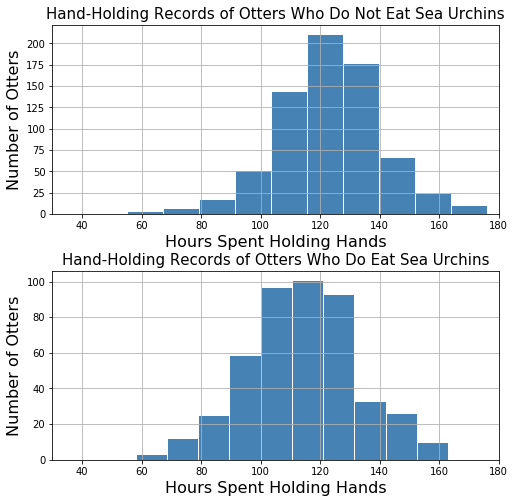

In [546]:
dfOttersEatUrchins = dfOtters.loc[dfOtters["urchins"] == 0].copy()
dfOttersDontEatUrchins = dfOtters.loc[dfOtters["urchins"] == 1].copy()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

dfOttersEatUrchins.hist(column="hhrecord", ax=axes[0], facecolor="steelblue", edgecolor="white")
axes[0].set_title("Hand-Holding Records of Otters Who Do Not Eat Sea Urchins", fontsize=15)
axes[0].set_xlabel("Hours Spent Holding Hands", fontsize=16)
axes[0].set_ylabel("Number of Otters", fontsize=16)

dfOttersDontEatUrchins.hist(column="hhrecord", ax=axes[1], facecolor="steelblue", edgecolor="white")
axes[1].set_title("Hand-Holding Records of Otters Who Do Eat Sea Urchins", fontsize=15)
axes[1].set_xlabel("Hours Spent Holding Hands", fontsize=16)
axes[1].set_ylabel("Number of Otters", fontsize=16)

axes[0].set_xlim([30,180])
axes[1].set_xlim([30,180])

**Part C**: Based on the histograms in **Part B**, characterize the distribution of hand-holding records for both urchin and non-urchin eaters.

For the histogram labeled "Hand-Holding Records of Otters Who Don't Eat Sea Urchins," the distribution is unimodally negatively skewed. For the histogram labeled, "Hand-Holding Records of Otters Who Do Eat Sea Urchins," the distribution is unimodally symmetric. 

**Part D**: What are the mean and median hand-holding record differences between otters who eat urchins and otters who don't?  Can you think of any reason not to use the mean as a measure of center to compare records for this problem? 

In [550]:
dfOttersEatUrchinsHandHoldingTimes = dfOttersEatUrchins["hhrecord"].copy()
dfOttersDontEatUrchinsHandHoldingTimes = dfOttersDontEatUrchins["hhrecord"].copy()

ottersUrchinMean = my_sample_mean(dfOttersEatUrchinsHandHoldingTimes)
ottersDontEatUrchinMean = my_sample_mean(dfOttersDontEatUrchinsHandHoldingTimes)

ottersUrchinSorted = dfOttersEatUrchinsHandHoldingTimes.sort_values().reset_index(drop=True)
ottersDontUrchinSorted = dfOttersDontEatUrchinsHandHoldingTimes.sort_values().reset_index(drop=True)

ottersUrchinMedian = oddMedianFind(ottersUrchinSorted)
ottersDontUrchinMedian = oddMedianFind(ottersDontUrchinSorted)

print("The mean hand-holding record of urchin-eating otters is {}.".format(ottersUrchinMean))
print("The mean hand-holding hand-holding of non-urchin-eating otters is {}.".format(ottersDontEatUrchinMean))
print("The median hand-holding record of urchin-eating otters is {}.".format(ottersUrchinMedian))
print("The median hand-holding hand-holding of non-urchin-eating otters is {}.".format(ottersDontUrchinMedian))

The mean hand-holding record of urchin-eating otters is 123.08531468531469.
The mean hand-holding hand-holding of non-urchin-eating otters is 113.81917211328977.
The median hand-holding record of urchin-eating otters is 123.
The median hand-holding hand-holding of non-urchin-eating otters is 115.


**Output**

The mean hand-holding record of urchin-eating otters is 123.08531468531469.
The mean hand-holding hand-holding of non-urchin-eating otters is 113.81917211328977.
The median hand-holding record of urchin-eating otters is 123.
The median hand-holding hand-holding of non-urchin-eating otters is 115.

**Summary**

One reason to not use mean as a measure of center to compare records for this problem is that there might b a way higher frequency of outliers for urchin-eating otters.

**Part E**: Create side-by-side box-and-whisker plots to compare the hand-holding records of otters who eat urchins and otters who do not.  Use the box-and-whisker plot conventions discussed in lecture. 

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'')

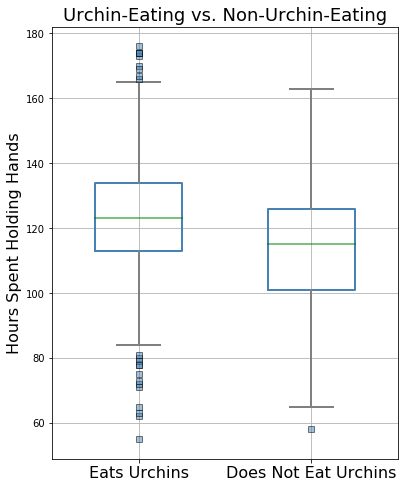

In [456]:
fig, ax = plt.subplots(figsize=(6,8))

bp = dfOtters.loc[(dfOtters["urchins"]== 0) | (dfOtters["urchins"]== 1)].boxplot(
    column=["hhrecord"], by="urchins", ax=ax, widths=[.5, .5], return_type="dict")

for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
        
# Set title and vertical axis label
ax.set_title('Urchin-Eating vs. Non-Urchin-Eating', fontsize=18)
ax.set_ylabel("Hours Spent Holding Hands", fontsize=16)

plt.xticks([1,2],["Eats Urchins", "Does Not Eat Urchins"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of hand-holding records of otters within each urchin / non-urchin groups as well as the comparison of the two classes. 

The box-and-whisker plots from Part E show that there are way more outliers for the handholding records of urchin-eating otters compared to non-urchin-eating urchins. We can also see that the median hand-holding time of urchin-eating otters is higher than the median hand-holding time of non-urchin-eating otters. The range of non-urchin-eating otters is greater than the range of urchin-eating otters.

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **D**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **D**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [554]:
def clean_election_data():
    '''
    Function to clean election data 
    '''
    #dfTitanic = dfTitanic[pd.notnull(df["Age"]) & pd.notnull(df["Pclass"]) & pd.notnull(df["Survived"] & pd.notnull(df["Sex"]))]
    # read in dirty data 
    df = pd.read_csv("2014_election_results.csv")
    dfClean = df[pd.notnull(df["STATE"])&pd.notnull(df["D"])&pd.notnull(df["GENERAL PERCENT"])]

    dfClean = dfClean.replace("Scattered",np.nan)
    dfClean["CANDIDATE NAME"] = dfClean["CANDIDATE NAME"].replace(np.nan,dfClean["CANDIDATE NAME (Last)"])
    dfClean["CANDIDATE NAME"] = dfClean["CANDIDATE NAME"].replace(np.nan,"UNKNOWN")
    dfClean["GENERAL PERCENT"] = dfClean["GENERAL PERCENT"].str.replace(',','.')
    dfClean["GENERAL PERCENT"] = dfClean["GENERAL PERCENT"].str.replace('%','')
    dfClean["GENERAL PERCENT"] = dfClean["GENERAL PERCENT"].astype(float)
    
    dfClean = dfClean[['STATE',"D","CANDIDATE NAME","GENERAL PERCENT"]]
    return dfClean

dfClean = clean_election_data()
dfClean.head(100)

,STATE,D,CANDIDATE NAME,GENERAL PERCENT
0,Alabama,1,"Byrne, Bradley",68.16
1,Alabama,1,"LeFlore, Burton R.",31.71
2,Alabama,1,UNKNOWN,0.13
5,Alabama,2,"Roby, Martha",67.34
6,Alabama,2,Wright,32.56
7,Alabama,2,UNKNOWN,0.09
10,Alabama,3,"Rogers, Mike",66.12
13,Alabama,3,"Smith, Jesse T.",33.72
14,Alabama,3,UNKNOWN,0.16
17,Alabama,4,"Aderholt, Robert",98.57


**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

In [555]:
def winners_and_margins(df):
    
#     dfNiwot = df.loc[df["NAME"] == 'NIWOT, CO US'].copy()
#     dfNiwot.head() 

    states = set(df["STATE"])
    print(states)
    
    return df

winners_and_margins(dfClean)

{'Michigan', 'South Dakota', 'Tennessee', 'Mississippi', 'New Jersey', 'Georgia', 'Maine', 'Missouri', 'North Dakota', 'Illinois', 'Kentucky', 'Massachusetts', 'District of Columbia', 'Montana', 'Wyoming', 'Oklahoma', 'Virginia', 'West Virginia', 'Guam', 'Northern Mariana Islands', 'Wisconsin', 'Utah', 'Delaware', 'American Samoa', 'Minnesota', 'North Carolina', 'Arkansas', 'Nebraska', 'South Carolina', 'Indiana', 'California', 'Iowa', 'New York', 'Virgin Islands', 'Rhode Island', 'Connecticut', 'Idaho', 'Oregon', 'Nevada', 'Texas', 'Kansas', 'Hawaii', 'Alabama', 'Colorado', 'Louisiana', 'Florida', 'Ohio', 'Pennsylvania', 'Vermont', 'Maryland', 'Arizona', 'New Hampshire', 'New Mexico', 'Washington', 'Alaska'}


,STATE,D,CANDIDATE NAME,GENERAL PERCENT
0,Alabama,1,"Byrne, Bradley",68.16
1,Alabama,1,"LeFlore, Burton R.",31.71
2,Alabama,1,UNKNOWN,0.13
5,Alabama,2,"Roby, Martha",67.34
6,Alabama,2,Wright,32.56
7,Alabama,2,UNKNOWN,0.09
10,Alabama,3,"Rogers, Mike",66.12
13,Alabama,3,"Smith, Jesse T.",33.72
14,Alabama,3,UNKNOWN,0.16
17,Alabama,4,"Aderholt, Robert",98.57


**Summary**

I did not have enough time to complete this problem.